# 03 - Training Results - Comparing Optimizers and Schedulers

In [1]:
import os

os.chdir('..')

In [3]:
from src.utils import visualization as viz
from src.dev import results

DATA_DIR = 'data/snake_clef2021_dataset/training_history/optimizers/'


# load specification and progress data
specs_df = results.load_specs_files(DATA_DIR)
df = results.load_progress_files(specs_df, path=DATA_DIR)
specs_df

,model_file,history_file,no_epochs,model,loss,opt,input_size,batch_size,full_ds,aug,scheduler,learning_rate,mixed_precision,note,date
0,clef2021_resnest101_ce_05-19-2021_15-43.pth,clef2021_resnest101_ce_05-19-2021_15-43.csv,30,resnest101,ce,sgd,256,128,False,False,False,0.100,NaN,NaN,05-19-2021_15-43
1,clef2021_resnest50_ce_05-19-2021_23-27.pth,clef2021_resnest50_ce_05-19-2021_23-27.csv,30,resnest50,ce,sgd,224,128,False,False,False,0.100,NaN,NaN,05-19-2021_23-27
2,clef2021_resnest101_ce_05-23-2021_09-32.pth,clef2021_resnest101_ce_05-23-2021_09-32.csv,30,resnest101,ce,adam,256,128,False,False,False,0.001,NaN,NaN,05-23-2021_09-32
3,clef2021_resnest101_ce_05-23-2021_19-58.pth,clef2021_resnest101_ce_05-23-2021_19-58.csv,30,resnest101,ce,adam,256,128,False,False,True,0.010,NaN,NaN,05-23-2021_19-58
4,clef2021_resnest101_ce_05-25-2021_19-20.pth,clef2021_resnest101_ce_05-25-2021_19-20.csv,30,resnest101,ce,sgd,256,128,False,False,True,0.100,True,NaN,05-25-2021_19-20
5,clef2021_resnest101_ce_05-30-2021_13-17.pth,clef2021_resnest101_ce_05-30-2021_13-17.csv,30,resnest101,ce,sgd,256,128,False,False,True,0.100,False,poly lr/mom scheduler with 0.5 polynom degree,05-30-2021_13-17


## SGD and Adam tested on ResNeSt-101

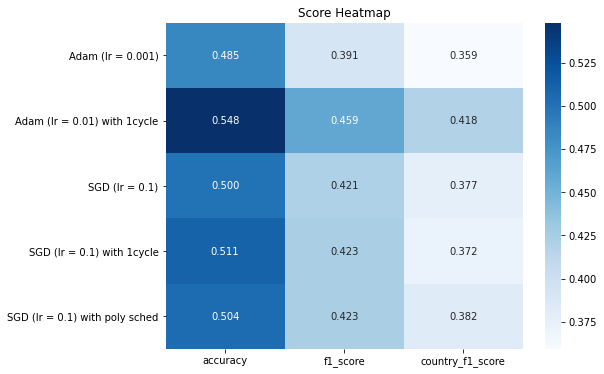

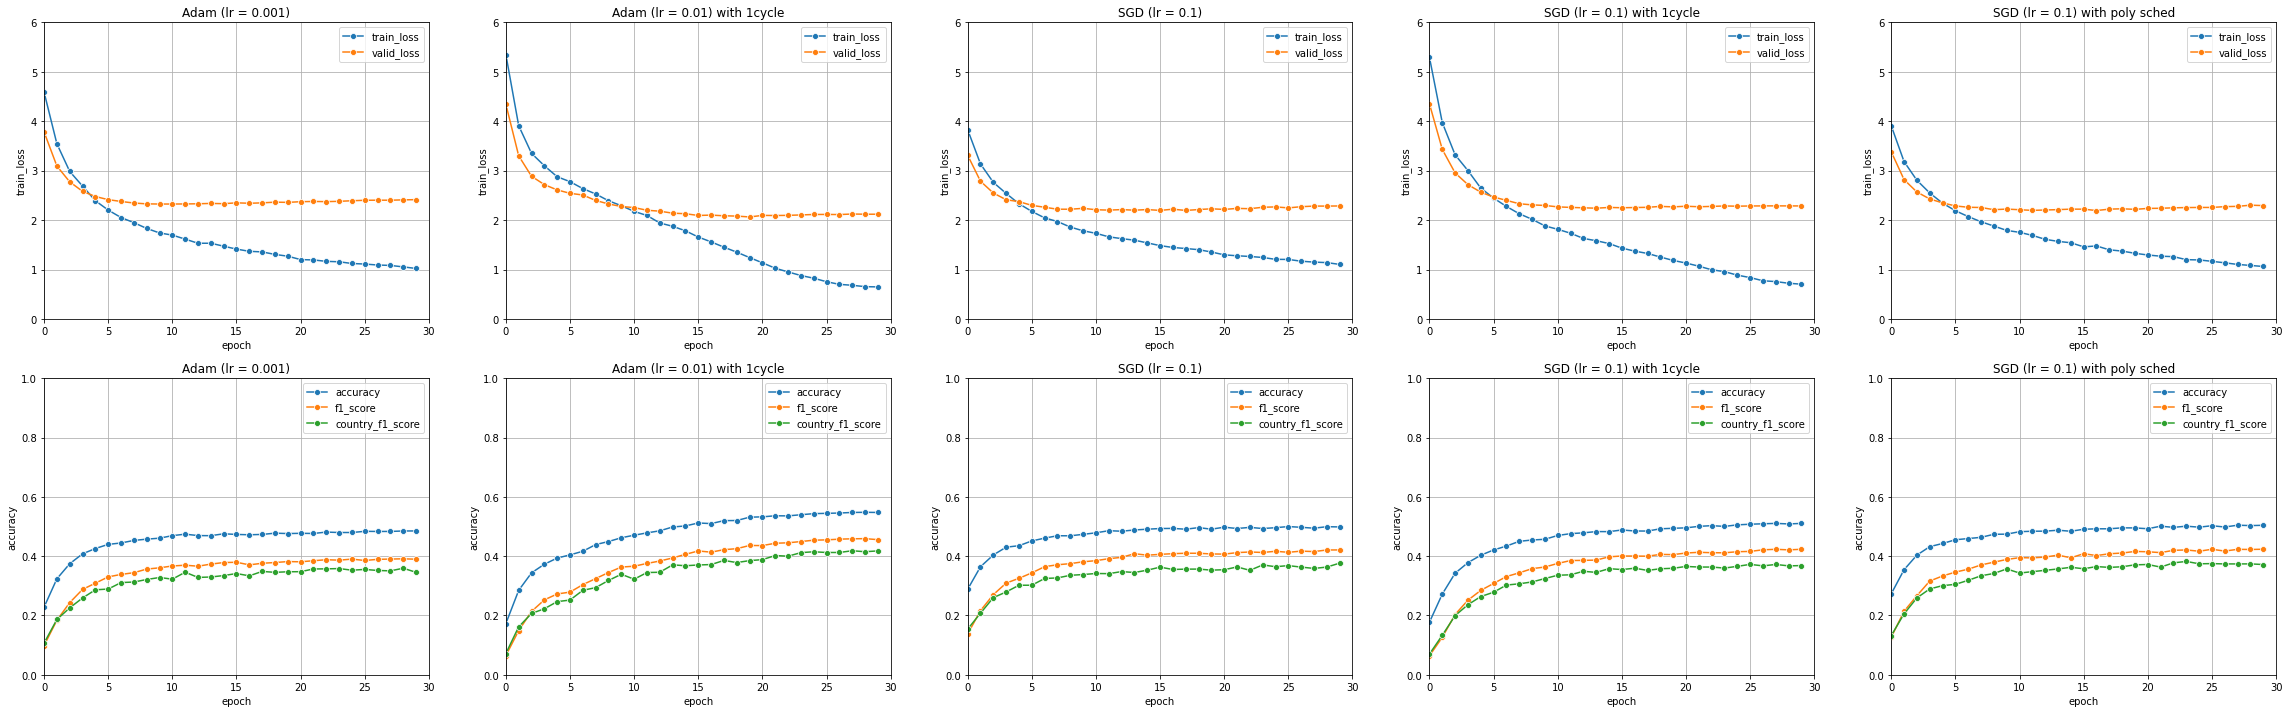

In [4]:
params = dict(model='resnest101', loss='ce', input_size=256, batch_size=128)

df['note'] = df['note'].fillna('')
g1 = results.filter_items(df, outlen=None, opt='adam', scheduler=False, note='', **params)
g2 = results.filter_items(df, outlen=30, opt='adam', scheduler=True, note='', **params)
g3 = results.filter_items(df, outlen=30, opt='sgd', scheduler=False, note='', **params)
g4 = results.filter_items(df, outlen=30, opt='sgd', scheduler=True, note='', **params)
g5 = results.filter_items(df, outlen=30, opt='sgd', scheduler=True,
                          note='poly lr/mom scheduler with 0.5 polynom degree', **params)


group_dict = {
    'Adam (lr = 0.001)': g1,
    'Adam (lr = 0.01) with 1cycle': g2,
    'SGD (lr = 0.1)': g3,
    'SGD (lr = 0.1) with 1cycle': g4,
    'SGD (lr = 0.1) with poly sched': g5}

viz.plot_score_heatmap(group_dict, cmap='Blues')
viz.compare_training_process(group_dict)